3.1 - Get your hands dirty
Using this csv (checkout_1) and using this csv (checkout_2) with hypothetical checkout data, imagine that you are trying to understand if there is any kind of anomaly behavior.

1. Analyze the data provided and present your conclusions .
2. In addition to the spreadsheet data, make a query in SQL and make a graphic of it and try to explain the anomaly behavior you found.
3. In this csv you have the number of sales of POS by hour comparing the same sales per hour from today, yesterday and the average of other days. So with this we can see the behavior from today and compare to other days

In [1]:
import pandas as pd

# data = pd.read_csv("checkout_1.csv")
# data.head

# data = pd.read_csv("checkout_2.csv")
# data.tail

In [2]:
def sales_analyses(file, tolerance=0):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    tolerance = tolerance/100
    data = pd.read_csv(file)
    data.head(30)

    axis_x = data.iloc[:,0].values
    today = data.iloc[:,1].values
    yesterday = data.iloc[:,2].values
    same_day = data.iloc[:,3].values
    avg_last_week = data.iloc[:,4].values
    avg_last_month = data.iloc[:,5].values

    width = 0.25

    bar1 = np.arange(len(axis_x))
    bar2 = [i+width for i in bar1]
    bar3 = [i+width for i in bar2]

    plt.figure(figsize=(20,10))
    plt.bar(bar1, today, width, label="today")
    plt.bar(bar2, yesterday, width, label="yesterday")
    plt.bar(bar3, same_day, width, label="same day last week")
    plt.plot(bar2, avg_last_week, linewidth=2, label="avg last week")
    plt.plot(bar2, avg_last_month, linewidth=2, label="avg last month", color="black")
    if tolerance != 0:
        plt.fill_between(bar2, (avg_last_month*(1+tolerance)), (avg_last_month*(1-tolerance)), alpha=0.25, linewidth=0, color="black")
    plt.title("Sales x Time", fontweight="bold")
    plt.xlabel("Time")
    plt.ylabel("Number of Sales")
    plt.xticks(rotation = 45)
    plt.xticks(bar1+width, axis_x)
    plt.legend()
    plt.show()

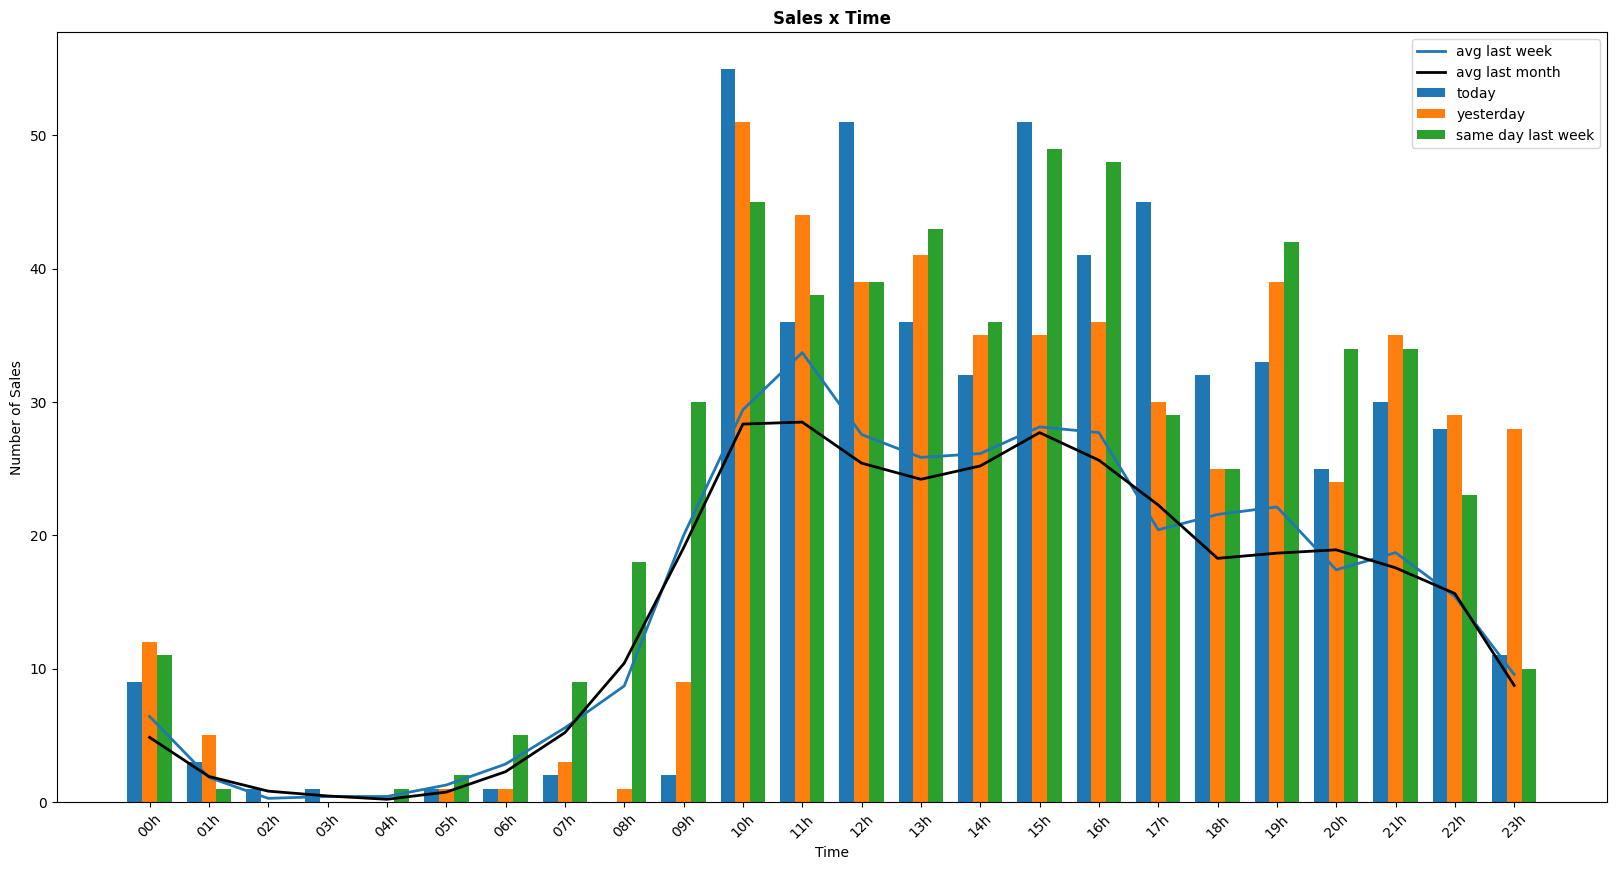

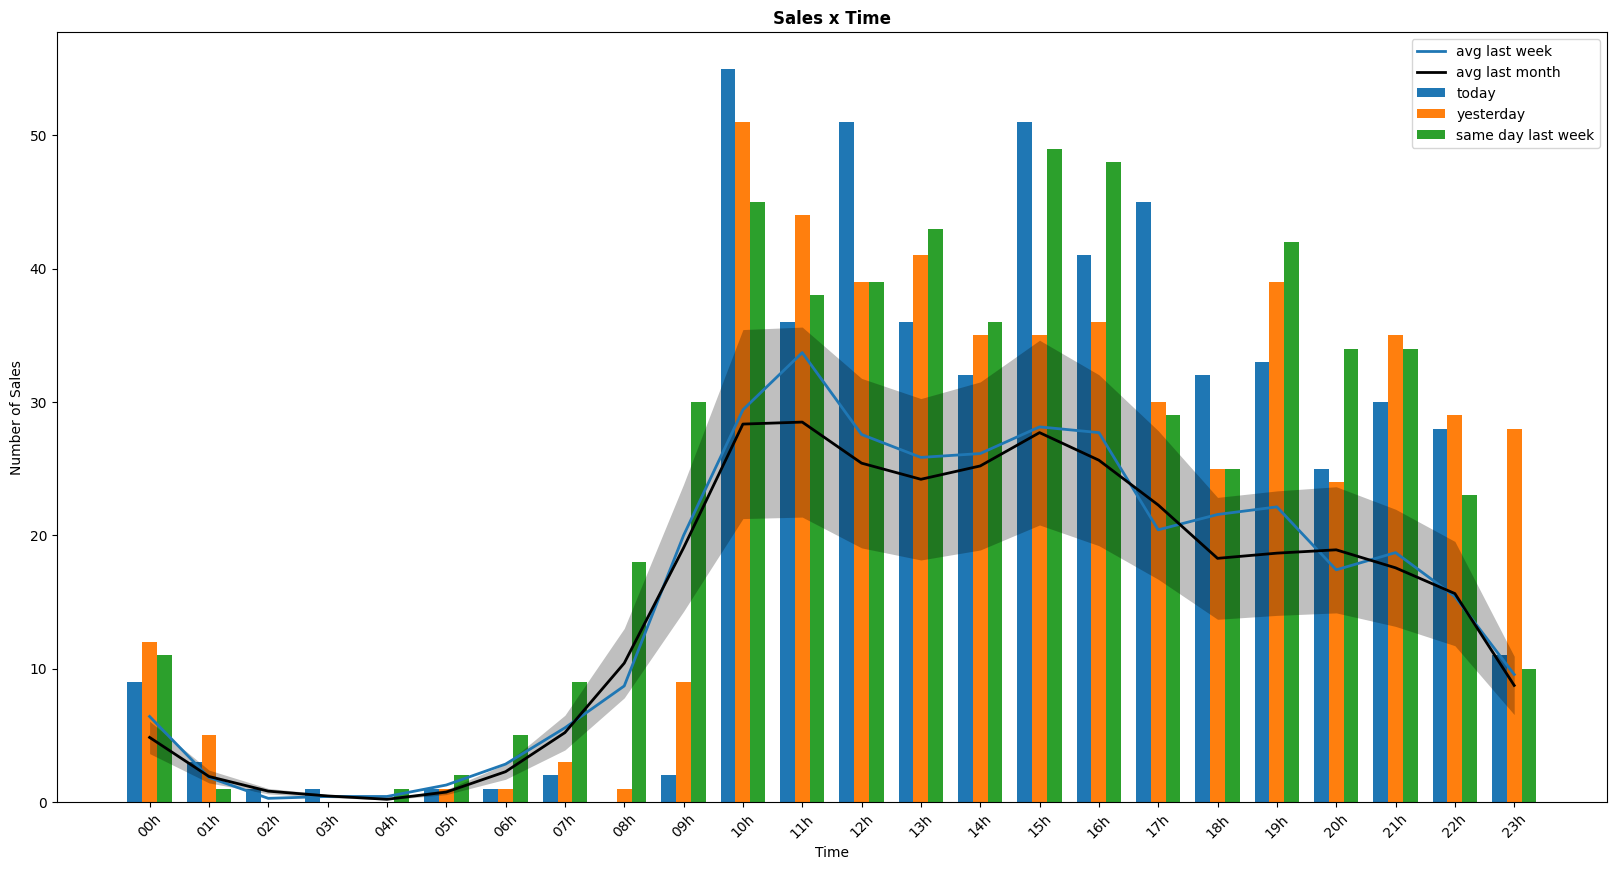

In [3]:
sales_analyses("checkout_1.csv")
sales_analyses("checkout_1.csv", 25)

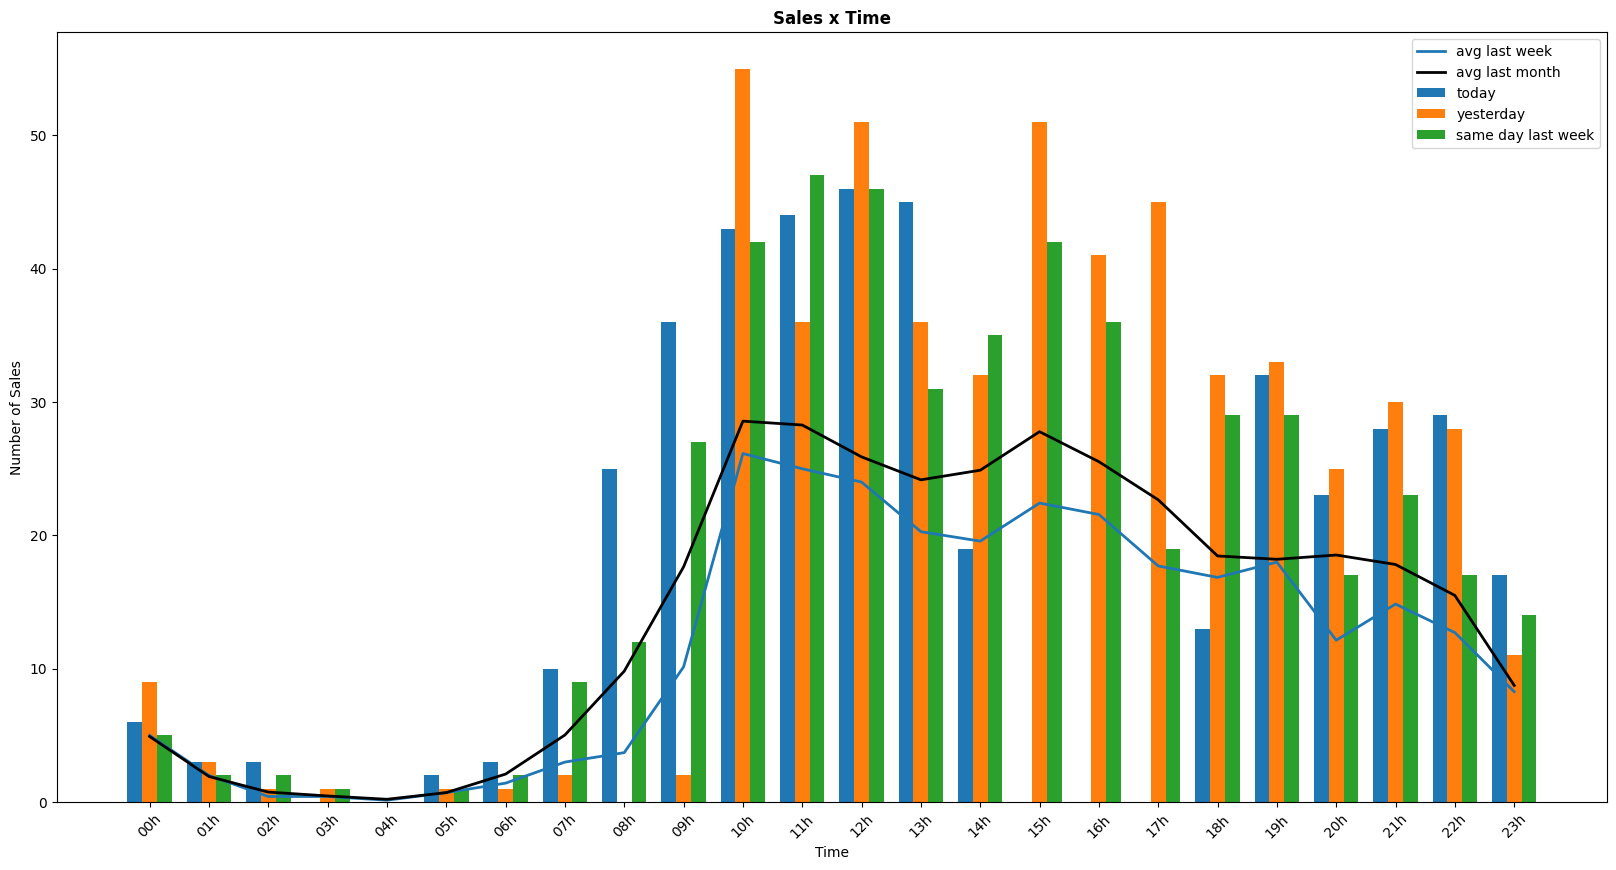

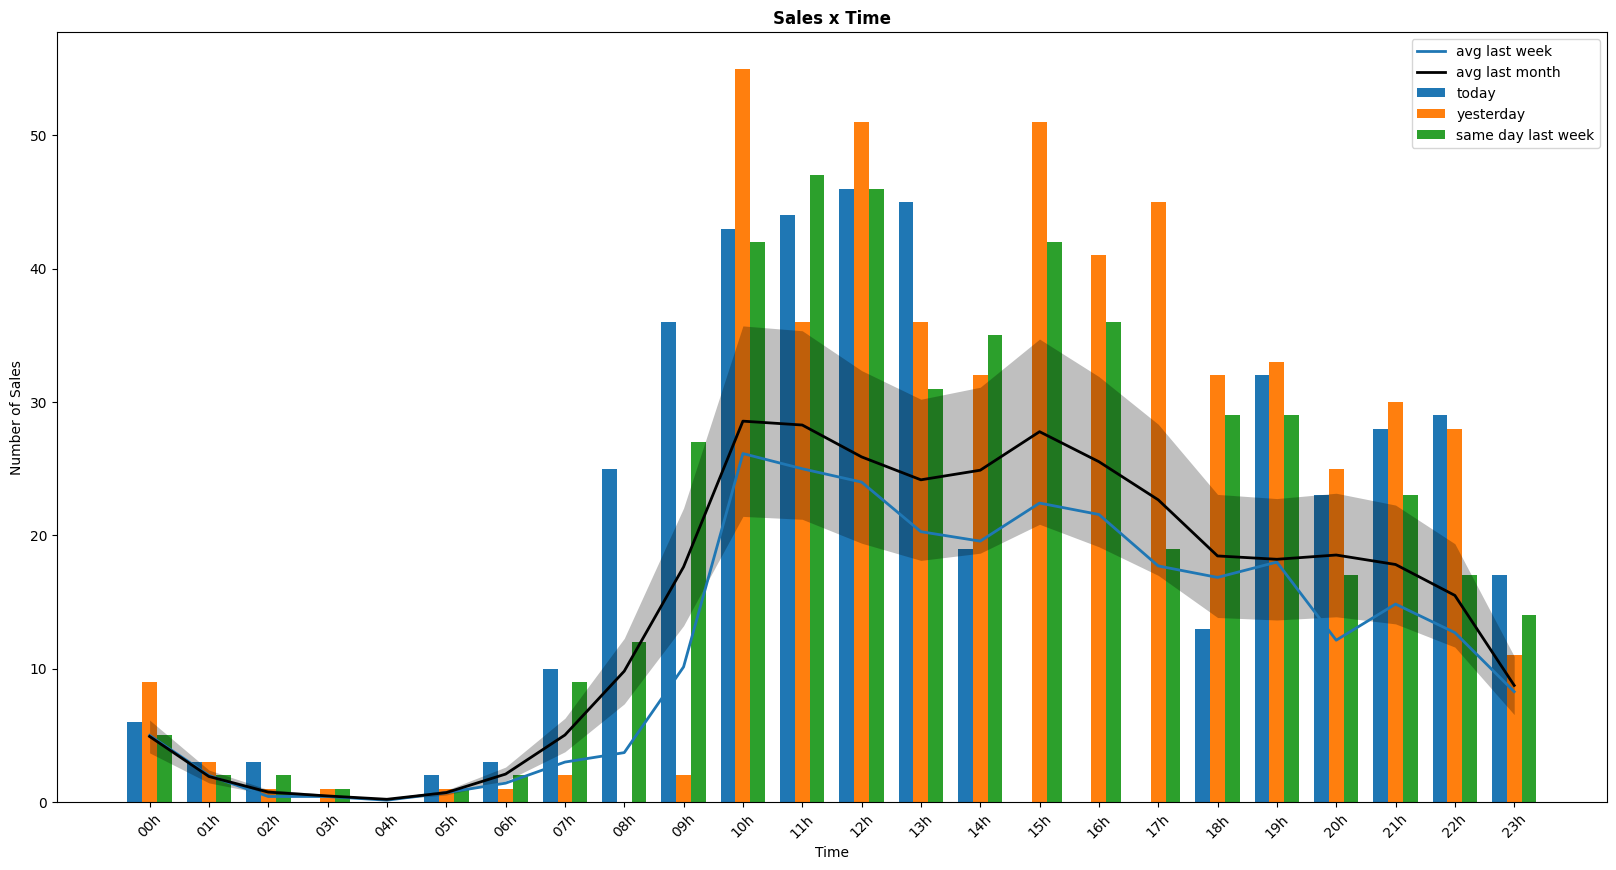

In [4]:
sales_analyses("checkout_2.csv")
sales_analyses("checkout_2.csv", 25)

ANÁLISE DOS GRÁFICOS

1. O checkout_1 são dados do dia anterior ao checkout_2.
2. Está ocorrendo um erro intermitente, deu falha no checkout_1 (8h, 9h) e no checkout_2 (15h, 16h, 17h)
3. Uma análise e hipóteses do que pode ter ocorrido nesses pontos descrepantes.
   3.1 Pontos abaixo da média
      - Falha do registro dos dados?
      - Problema com servidor?
      - Manutenção do sistema?

   3.2 Pontos acima da média
      - Sazonalidade?
         - Início ou final do mês?
         - Dia da semana?
      - Campanhas publicitárias?